In [73]:
import re
import pandas as pd
import numpy as np

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk.translate.bleu_score as bleu
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.translate.bleu_score as bleu
# nltk.download('vader_lexicon') + Uncomment to download latest when running the first time

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer

%matplotlib inline

In [2]:
analyzer = SentimentIntensityAnalyzer()
wn = WordNetLemmatizer()
sw = stopwords.words('english')

# Extend stopwords to remove words not in corpus (if needed):
sw.extend(["I've", "We've", "I'll", "we've"])

In [3]:
Bob_Swan_CEO = """Thanks, Pat and welcome back to Intel. It has been an honor to lead this incredible company and its talented team. It gives me great confidence in Intel's future knowing that I'll be passing the baton to Pat whose technical expertise, industry knowledge, execution track record, and commitment to our company are indisputable. Over the last two years, we made significant progress on our strategy to transform Intel into a multi-architecture XPU company, to move from silicon to solutions, and to contemporize our IDM model.
I am proud of what we're able to achieve together as an Intel team in a relatively short period of time and echo Omar's words that Intel is in a strong strategic and financial position as we make this transition. As demonstrated by the results we announced today, demand for Intel's innovative technologies remains very strong and our investments to capitalize on future growth opportunities are paying off. Our Q4 results significantly exceeded our expectations capping off our fifth consecutive year of record revenue. We generated $20 billion in revenue and $1.52 in EPS, exceeding our guidance by $2.6 billion and $0.42 respectively.
For the full year, we delivered $77.9 billion in revenue, up 8%, and $5.30 in EPS, up 9%. The client, data center, memory, and Mobileye businesses each set all-time revenue records. In Q4, we continued to advance our three strategic priorities: improving our execution to strengthen our core business, extending our reach to accelerate growth and redefine our position in the industry, and continuing to thoughtfully deploy capital to create value for our shareholders. Let me briefly discuss some of the highlights.
Starting with improving our execution to strengthen our core business, let me start with an update on process technology and our product road map. Over the last few years, we've been following the IDM model to ensure we can deliver a predictable cadence of leadership products, preserve our IDM advantage, continue to invest in process technology leadership, and generate attractive returns on capital. This evolution includes a disaggregated design strategy, adoption of standard industry processes and common tools, flows, and methods, and deeper engagement with the industry ecosystem. In July, we highlighted a challenge with our 7-nanometer technology and starting a process to improve it while evaluating the best approach for our 2023 product lineup.
Since that time, we have made tremendous progress on our 7-nanometer technology. When 7-nanometer was originally defined, the flow contained a particular sequence of steps that contributed to the defect issue we discussed in July. By rearchitecting these steps, we've been able to resolve the defects. As part of this work over the last six months, we also streamlined and simplified our 7-nanometer process architecture to better ensure we'll be able to deliver on our 2023 product road map.
The inline data we have been collecting and our pipeline of proven yield development projects gives us confidence in our ability to deliver on our commitments going forward. At the same time, as Pat mentioned, we will continue to leverage the relationships we've developed over the years with our external foundry partners and believe they can play a larger role in our product road map given our disaggregated designs. Once Pat has had a chance to join, he'll further assess our analysis and drive the final manufacturing decision for our 2023 CPU products. Therefore, we'll communicate that decision soon after he takes over, but not today.
Turning to products. We've qualified several new products in the fourth quarter, and we have an incredibly exciting lineup of CPUs for '21 and '22. Just a couple of weeks ago at CES, we introduced more than 50 processors resulting in more than 500 new designs for laptops and desktops coming to market in 2021. We are also seeing tremendous market response for PCs based on our new 11th Gen Intel Core Tiger Lake processors.
Our PC customers now have more than 150 Tiger Lake-based systems in the market, well ahead of expectations. We believe we gained market share as PCs, CPU units grew an impressive 33% in the quarter. In a market where competitors are seeing supply challenges, this is a powerful example of the incredible value and scale of our factory network as we continue to deliver greater performance and cost efficiencies for our customers. Moving to the data center, we are now shipping our first 10-nanometer based Xeon Scalable CPU Ice Lake and will be ramping volume through the first quarter.
Customers are going to see significant value in Ice Lake across cloud, network, and edge workloads with excellent performance improvement and innovations such as PCIe Express Gen 4, next-generation Intel Optane Persistent Memory, and security enhancements such as SGX. As we look ahead, we are excited about the capabilities we are bringing to customers with Alder Lake for mobile and desktop PCs and Sapphire Rapids for the data center. These products take advantage of our Enhanced SuperFin process technology in numerous architectural improvements and both are broadly sampling to customers. We will qualify Alder Lake desktop and notebook for production and begin our volume ramp in the second half of '21, and we expect production qualification of Sapphire Rapids at the end of 2021.
In the expanded market opportunity in front of us, CPUs are critical, but multiple architectures or XPUs will be required to help customers optimize for specific workloads. We had a big XPU leap in the fourth quarter as we entered the discrete graphics market with Intel Iris Xe MAX graphics, Intel's first Xe-based discrete GPU. We are now shipping discrete graphics into thin and light notebooks from Acer, Asus, and Dell, and we introduced our first discrete GPU for the data center, which is already delivering great cloud gaming experiences for customers such as Tencent. We also announced the gold release of one API, our cross-industry open standards-based unified programming model that delivers a common developer experience across architectures.
Second, we've made strong progress extending our reach to accelerate our growth. Over the past several years, we have been making investments that have positioned us to lead key technology inflections such as AI, 5G network transformation, and the intelligent autonomous edge. We infuse AI capabilities into everything we make from the cloud to PCs and we see tremendous growth prospects as we build our position in data center training to complement the strength of our Intel Xeon for inference. We made a significant step in AI this quarter when Amazon announced EC2 instances that will leverage up to eight of our Habana Gaudi AI training accelerators, and deliver up to 40% better price-performance than current GPU-based EC2 instances for machine learning workloads.
We've also invested to drive networking workload convergence on Intel silicon. In 2020, we expanded our footprint into the Radio Access Network delivering Xeon SoCs, FPGAs, and custom solutions for 5G base station designs and reaching our goal of 40% share, two years ahead of our original target. Today, we are the leading network silicon provider winning in the wireless, enterprise, and cloud networks, and delivering $6 billion in revenue this year, up approximately 20% versus 2019. Finally, we have enviable assets to lead the explosive growth of intelligent and autonomous edge computing.
Our IOTG and Mobileye businesses have combined annual revenue of $4 billion. Mobileye delivered a record fourth quarter and had an explosive start to 2021 with a number of exciting CES announcements. Third, we've maintained our discipline in thoughtfully allocating our shareholders' capital. Since 2015, we have grown revenue by more than $22 billion and more than doubled EPS.
We've driven spending from 36% of revenue to 25% of revenue while investing in manufacturing capacity expansion, adding more than $1 billion of R&D targeted to higher growth initiatives, and focusing our product portfolio. As a result, we anticipate approximately $12 billion in proceeds from our NAND and McAfee exits over time. At the same time, we've been delivering substantial capital returns to shareholders, including $19.8 billion in 2020 alone through dividends and share buybacks, the latter of which included a $10 billion accelerated share repurchase announced in August. Building on this, today, we announced that we are increasing our annual dividend by $0.07, or 5% from $1.32 to $1.39 per share.
Before I pass it to George for more details on our fourth-quarter results, I want to reiterate that I couldn't be more proud of the team at Intel and I cherish the time I've spent here. I look forward to watching Pat and the team's continued progress as they build on Intel's purpose to deliver breakthrough technology that enriches the lives of everyone on the planet. I also thank our investors and analysts on the line today for their continued support of Intel and for our valued engagements over the years.
"""

In [4]:
# George_Davis_CFO = """Thanks, Bob, and good afternoon everyone. Q4 marked a much stronger than expected finish to a record year. Both Mobileye and our PC-centric segment achieved record quarters. Q4 revenue was $20 billion, exceeding our guidance by $2.6 billion.
# The revenue beat was broad-based led by stronger than expected notebook and cloud demand, along with contributions from desktop and enterprise and government. Datacenter related demand also led to stronger revenues in NAND. The gross margin for the quarter was 58.4%, exceeding the guide by 3 points due to flow through on higher revenue, and the benefit of Ice Lake server achieving production qualification prior to year-end. Q4 EPS was $1.52, $0.42 above our guide due to strong operational performance, and further boosted by gains from our ICAP portfolio.
# Excluding a one-time tax adjustment, about two-thirds of our EPS beat was operational and one-third was below the line. For full-year 2020, we achieved record revenue of $77.9 billion, $4.4 billion higher than our January guide, which reflects a one-year acceleration relative to our 2019 Investor Day target. EPS was $5.30, up to $0.43 year over year, and $0.30 higher than our January guide. We generated $21.1 billion of free cash flow, up 25% year on year, and returned 94% of free cash flow to shareholders.
# In total, we have repurchased approximately $17.6 billion shares as part of our planned $20 billion share repurchases announced in October 2019. We intend to complete the remaining $2.4 billion balance in Q1 '21. Moving briefly to the segment performance, our data center group generated record revenue in 2020, up 11% year over year. In Q4, DCG delivered revenue of $6.1 billion, down 16% year over year driven by enterprise and government weakness, and cloud digestion albeit lower than expected.
# As a reminder, Q4 '19 was tough to compare with an all-time record for revenue with strength across all segments. DCGs operating margin in Q4 was down $1.4 billion years on year on lower revenue and increased investment. Our other data-centric businesses were up 1% year over year in 2020. In Q4, these businesses were down 5% year over year, driven largely by COVID-related demand impacts, partially offset by Mobileye growth.
# IOTG revenue was down 16% year over year, due to COVID effects on demand. We expect a recovery in IOTG in 2021 and saw sequential growth of $100 million in the quarter on stabilizing industrial and video segments. Mobileye revenue was up 39% year over year in the quarter and the operating margin was $110 million, both records as IQSoC demand continues to be strong. NSG revenue was $1.2 billion, down 1% year on year on lower ASPs, partially offset by higher volume growth.
# The operating margin was $76 million. PSG revenue was down 16% year over year, due mostly to 5G ASIC transitions at key accounts in the communications segment. CCG delivered a fifth straight year of record revenue, up 8% year over year. For the quarter, revenue was up 9% year over year, driven by record notebook unit volume.
# ASPs were down 11%, due to increased volume in consumer entry and education segments. Adjacency revenue was down 31%, driven by modem ramp down and the divestiture of our Home Gateway Business. Operating income was $4.5 billion, up $420 million year over year on higher volume, partially offset by the ramp of 10-nanometer products. Moving to our outlook.
# As Bob and Trey said, we believe it is important to give Pat time to assume his new role and dig into the business before announcing our full-year 2021 guidance and longer-term plans. However, I will provide our Q1 outlook, and then for the year discuss the high-level headwinds and tailwinds we expect. As a reminder, our outlook for 2021 excludes the NAND business. We expect Q1 revenue of $17.5 billion, down 12% year over year, or down 6% excluding NAND.
# We see continuing strong demand for notebook PCs in Q1, up significantly year over year and expect desktop volumes to be down year over year. We anticipate further cloud digestion and continued COVID demand impacts on IOTG. The Q1 revenue estimate also includes approximately $500 million in corporate revenue that is one-time in nature and relates to a prepaid revenue arrangement. As we look at the remainder of the year, we see solid TAM growth in our core markets in 2021.
# We expect PC demand to be more first-half weighted than normal seasonality and expect data-centric demand to be more concentrated in the second half as cloud digestion eases, and COVID impacted markets such as enterprise, data center, and IoT improve. We have strong product road maps but have anticipated a more competitive market and the continued mix shift to entry consumer PCs in our revenue plans this year. Finally, we will see lower modem revenue this year from our exit of that business. Gross margin in Q1 is expected to be approximately 58%, down year over year by approximately 4 points on mix related ASPs from lower Xeon SoC volume, and higher small core PC units partially offset by lower margin impact from divested businesses and some improvements from our DCG adjacencies.
# Q1 operating margin is expected to be approximately 30%. We are forecasting EPS of approximately $1.10 per share, and a tax rate of 14.5%. With that, let me turn it back over to Trey, and get to your questions."""

In [5]:
def clean_word(token, sw):
    # Lemmatize nouns and verbs:
    clean_token = wn.lemmatize(token, pos='n')
    clean_token = wn.lemmatize(clean_token, pos='v')
    # remove stopwords:
    if ((clean_token not in sw) and (len(clean_token) >= 3)): 
        return clean_token

In [6]:
def preprocess_text(text):
    # Lowercase text:
    text = text.lower()
    # Remove digits with no letters before or after:
    text = re.sub(r'\b\d+\b', '', text)
    # Tokenize sentences:
    tokens = word_tokenize(text)
    # Clean each word using clean_word function:
    clean_tokens = [clean_word(w, sw) for w in tokens]
    # Remove instances of None from the list of clean tokens:
    clean_tokens = list(filter(None, clean_tokens))
    # Return the list of clean tokens:
    return ' '.join(clean_tokens)

In [7]:
df_ceo = pd.DataFrame({"sentences":sent_tokenize(Bob_Swan_CEO)})
df_ceo["preprocessed_sentences"] = df_ceo.sentences.apply(preprocess_text)

# df_cfo = pd.DataFrame({"sentences":sent_tokenize(George_Davis_CFO)})
# df_cfo["preprocessed_sentences"] = df_cfo.sentences.apply(preprocess_text)

In [8]:
df_ceo.head(10)

,sentences,preprocessed_sentences
0,"Thanks, Pat and welcome back to Intel.",thank pat welcome back intel
1,It has been an honor to lead this incredible c...,honor lead incredible company talented team
2,It gives me great confidence in Intel's future...,give great confidence intel future know 'll pa...
3,"Over the last two years, we made significant p...",last two year make significant progress strate...
4,I am proud of what we're able to achieve toget...,proud 're able achieve together intel team rel...
5,As demonstrated by the results we announced to...,demonstrate result announce today demand intel...
6,Our Q4 results significantly exceeded our expe...,result significantly exceed expectation cap fi...
7,We generated $20 billion in revenue and $1.52 ...,generate billion revenue eps exceed guidance b...
8,"For the full year, we delivered $77.9 billion ...",full year deliver billion revenue eps
9,"The client, data center, memory, and Mobileye ...",client data center memory mobileye business se...


In [9]:
# df_cfo.head(10)

### Assign polarity scores to unprocessed sentences

In [10]:
# Initialize empty scores list:
ceo_unprocessed_polarity_scores = []

# Assign polarity scores:
for sentence in df_ceo['sentences']:
    try:
        sentiment = analyzer.polarity_scores(sentence)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        ceo_unprocessed_polarity_scores.append({
            'sentences': sentence,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
    except AttributeError:
        pass
    
# Create DataFrame:
ceo_unprocessed_sentiments_df = pd.DataFrame(ceo_unprocessed_polarity_scores)

# Display 10 rows:
ceo_unprocessed_sentiments_df.head(10)

,sentences,compound,positive,negative,neutral
0,"Thanks, Pat and welcome back to Intel.",0.7096,0.541,0.000,0.459
1,It has been an honor to lead this incredible c...,0.7579,0.351,0.000,0.649
2,It gives me great confidence in Intel's future...,0.8750,0.256,0.000,0.744
3,"Over the last two years, we made significant p...",0.6486,0.184,0.000,0.816
4,I am proud of what we're able to achieve toget...,0.7506,0.155,0.000,0.845
5,As demonstrated by the results we announced to...,0.8805,0.323,0.041,0.635
6,Our Q4 results significantly exceeded our expe...,0.0000,0.000,0.000,1.000
7,We generated $20 billion in revenue and $1.52 ...,0.3400,0.118,0.000,0.882
8,"For the full year, we delivered $77.9 billion ...",0.0000,0.000,0.000,1.000
9,"The client, data center, memory, and Mobileye ...",0.0000,0.000,0.000,1.000


In [11]:
# # Initialize empty scores list:
# cfo_unprocessed_polarity_scores = []

# # Assign polarity scores:
# for sentence in df_cfo['sentences']:
#     try:
#         sentiment = analyzer.polarity_scores(sentence)
#         compound = sentiment['compound']
#         pos = sentiment['pos']
#         neu = sentiment['neu']
#         neg = sentiment['neg']
#         cfo_unprocessed_polarity_scores.append({
#             'sentences': sentence,
#             'compound': compound,
#             'positive': pos,
#             'negative': neg,
#             'neutral': neu
#         })
#     except AttributeError:
#         pass
    
# # Create DataFrame:
# cfo_unprocessed_sentiments_df = pd.DataFrame(cfo_unprocessed_polarity_scores)

# # Display 10 rows:
# cfo_unprocessed_sentiments_df.head(10)

# Assign polarity scores to Preprocessed sentences

In [12]:
# Initialize empty scores list:
ceo_preprocessed_polarity_scores = []

# Assign polarity scores:
for sentence in df_ceo['preprocessed_sentences']:
    try:
        sentiment = analyzer.polarity_scores(sentence)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        ceo_preprocessed_polarity_scores.append({
            'preprocessed_sentences': sentence,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
    except AttributeError:
        pass
    
# Create DataFrame:
ceo_preprocessed_sentiments_df = pd.DataFrame(ceo_preprocessed_polarity_scores)

# Display 10 rows:
ceo_preprocessed_sentiments_df.head(10)

,preprocessed_sentences,compound,positive,negative,neutral
0,thank pat welcome back intel,0.6705,0.647,0.000,0.353
1,honor lead incredible company talented team,0.7579,0.619,0.000,0.381
2,give great confidence intel future know 'll pa...,0.8750,0.357,0.000,0.643
3,last two year make significant progress strate...,0.7096,0.315,0.000,0.685
4,proud 're able achieve together intel team rel...,0.7506,0.252,0.000,0.748
5,demonstrate result announce today demand intel...,0.8658,0.473,0.118,0.408
6,result significantly exceed expectation cap fi...,0.0000,0.000,0.000,1.000
7,generate billion revenue eps exceed guidance b...,0.3400,0.255,0.000,0.745
8,full year deliver billion revenue eps,0.0000,0.000,0.000,1.000
9,client data center memory mobileye business se...,0.0000,0.000,0.000,1.000


In [13]:
# # Initialize empty scores list:
# cfo_preprocessed_polarity_scores = []

# # Assign polarity scores:
# for sentence in df_cfo['preprocessed_sentences']:
#     try:
#         sentiment = analyzer.polarity_scores(sentence)
#         compound = sentiment['compound']
#         pos = sentiment['pos']
#         neu = sentiment['neu']
#         neg = sentiment['neg']
#         cfo_preprocessed_polarity_scores.append({
#             'preprocessed_sentences': sentence,
#             'compound': compound,
#             'positive': pos,
#             'negative': neg,
#             'neutral': neu
#         })
#     except AttributeError:
#         pass
    
# # Create DataFrame:    
# cfo_preprocessed_sentiments_df = pd.DataFrame(cfo_preprocessed_polarity_scores)

# # Display 10 rows:
# cfo_preprocessed_sentiments_df.head(10)

### Assign Sentiment Score

In [14]:
# # Create sentiment column with default value of 0:
# ceo_preprocessed_sentiments_df['sentiment']=0

# # Conditional loop to assign sentence sentiment value:
# for index, row in ceo_preprocessed_sentiments_df.iterrows():
#     pos = row["positive"]
#     neg = row['negative']
#     neu = row["neutral"]
#     if (pos > neg) and (pos > neu):
#         ceo_preprocessed_sentiments_df.at[index, 'sentiment'] = 1
#     elif (neg > pos) and (neg > neu):
#         ceo_preprocessed_sentiments_df.at[index, 'sentiment'] = 0
#     else:
#         ceo_preprocessed_sentiments_df.at[index, 'sentiment'] = 2

# # Display 10 rows:
# ceo_preprocessed_sentiments_df.head(10)

In [15]:
# # Create sentiment column with default value of 0:
# cfo_preprocessed_sentiments_df['sentiment']=0

# # Conditional loop to assign sentence sentiment value:
# for index, row in cfo_preprocessed_sentiments_df.iterrows():
#     pos = row["positive"]
#     neg = row['negative']
#     neu = row["neutral"]
#     if (pos > neg) and (pos > neu):
#         cfo_preprocessed_sentiments_df.at[index, 'sentiment'] = 1
#     elif (neg > pos) and (neg > neu):
#         cfo_preprocessed_sentiments_df.at[index, 'sentiment'] = 0
#     else:
#         cfo_preprocessed_sentiments_df.at[index, 'sentiment'] = 2

# # Display 10 rows:
# cfo_preprocessed_sentiments_df.head(10)

## Assign sentiment score based off of compound polarity score

In [16]:
# Create sntiment column with default value of 0:
ceo_preprocessed_sentiments_df['sentiment']=0

# Conditional loop to assign sentiment value from compound score conditionals:
for index, row in ceo_preprocessed_sentiments_df.iterrows():
    comp = row['compound']
    if comp >= 0.05:
        ceo_preprocessed_sentiments_df.at[index,'sentiment'] = 1
    elif comp <= -0.05:
        ceo_preprocessed_sentiments_df.at[index,'sentiment'] = 0
    else:
        ceo_preprocessed_sentiments_df.at[index,'sentiment'] = 2
        
# Display dataFrame:
ceo_preprocessed_sentiments_df.head(10)

,preprocessed_sentences,compound,positive,negative,neutral,sentiment
0,thank pat welcome back intel,0.6705,0.647,0.000,0.353,1
1,honor lead incredible company talented team,0.7579,0.619,0.000,0.381,1
2,give great confidence intel future know 'll pa...,0.8750,0.357,0.000,0.643,1
3,last two year make significant progress strate...,0.7096,0.315,0.000,0.685,1
4,proud 're able achieve together intel team rel...,0.7506,0.252,0.000,0.748,1
5,demonstrate result announce today demand intel...,0.8658,0.473,0.118,0.408,1
6,result significantly exceed expectation cap fi...,0.0000,0.000,0.000,1.000,2
7,generate billion revenue eps exceed guidance b...,0.3400,0.255,0.000,0.745,1
8,full year deliver billion revenue eps,0.0000,0.000,0.000,1.000,2
9,client data center memory mobileye business se...,0.0000,0.000,0.000,1.000,2


In [17]:
# # Create sntiment column with default value of 0:
# cfo_preprocessed_sentiments_df['sentiment']=0

# # Conditional loop to assign sentiment value from compound score conditionals:
# for index, row in cfo_preprocessed_sentiments_df.iterrows():
#     pos = row["positive"]
#     neg = row['negative']
#     neu = row["neutral"]
#     comp = row['compound']
#     if comp >= 0.05:
#         cfo_preprocessed_sentiments_df.at[index, 'compound_sentiment_score'] = 1
#     elif comp <= -0.05:
#         cfo_preprocessed_sentiments_df.at[index, 'compound_sentiment_score'] = 0
#     else:
#         cfo_preprocessed_sentiments_df.at[index, 'compound_sentiment_score'] = 2
        
# cfo_preprocessed_sentiments_df.head(10)

#### Drop Neutrals

In [18]:
ceo_preprocessed_sentiments_df = ceo_preprocessed_sentiments_df.drop(columns=['compound','positive','negative','neutral'])

In [19]:
ceo_preprocessed_sentiments_df.head(10)

,preprocessed_sentences,sentiment
0,thank pat welcome back intel,1
1,honor lead incredible company talented team,1
2,give great confidence intel future know 'll pa...,1
3,last two year make significant progress strate...,1
4,proud 're able achieve together intel team rel...,1
5,demonstrate result announce today demand intel...,1
6,result significantly exceed expectation cap fi...,2
7,generate billion revenue eps exceed guidance b...,1
8,full year deliver billion revenue eps,2
9,client data center memory mobileye business se...,2


In [20]:
ceo_preprocessed_sentiments_df = ceo_preprocessed_sentiments_df[ceo_preprocessed_sentiments_df.sentiment < 2]

In [21]:
ceo_preprocessed_sentiments_df.head(10)

,preprocessed_sentences,sentiment
0,thank pat welcome back intel,1
1,honor lead incredible company talented team,1
2,give great confidence intel future know 'll pa...,1
3,last two year make significant progress strate...,1
4,proud 're able achieve together intel team rel...,1
5,demonstrate result announce today demand intel...,1
7,generate billion revenue eps exceed guidance b...,1
10,continue advance three strategic priority impr...,1
11,let briefly discus highlight,1
12,start improve execution strengthen core busine...,1


In [22]:
# Create the features (X) and the target vector (y)
X = ceo_preprocessed_sentiments_df["preprocessed_sentences"].values
y = ceo_preprocessed_sentiments_df["sentiment"].values

In [23]:
# Create the train, test, and validation sets:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [24]:
# Define two lists to store vader sentiment scoring:
y_vader_pred = []
y_vader_prob = []

In [25]:
# Score sentiment of test set using Vader:
for comment in X_test:
    print(comment)
    y_vader_prob.append(analyzer.polarity_scores(comment)["pos"])
    sentiment_score = analyzer.polarity_scores(comment)["compound"]
    if sentiment_score >= 0.1:
        y_vader_pred.append(1)
    else:
        y_vader_pred.append(0)

let briefly discus highlight
pat chance join 'll ass analysis drive final manufacture decision cpu product
've drive spend revenue revenue invest manufacture capacity expansion add billion target higher growth initiative focus product portfolio
look forward watch pat team continue progress build intel purpose deliver breakthrough technology enrich life everyone planet
finally enviable asset lead explosive growth intelligent autonomous edge compute
last year 've follow idm model ensure deliver predictable cadence leadership product preserve idm advantage continue invest process technology leadership generate attractive return capital
part work last six month also streamline simplify -nanometer process architecture better ensure 'll able deliver product road map
past several year make investment position lead key technology inflection network transformation intelligent autonomous edge
demonstrate result announce today demand intel innovative technology remain strong investment capitalize

In [26]:
# Option 1: Normalizing data using MinMaxScaler from sklearn:
scaler = MinMaxScaler()
scaler.fit(np.array(y_vader_prob).reshape(-1,1))
y_vader_prob_norm = scaler.transform(np.array(y_vader_prob).reshape(-1,1))
y_vader_prob_norm[:5]

array([[0.6399177 ],
       [0.24279835],
       [0.        ],
       [0.03292181],
       [0.82921811]])

In [27]:
# Option 2: Using a comprehension list (OPTIONAL - RATHER USE MINMAXScaler):
normalized = [(x - min(y_vader_prob)) / (max(y_vader_prob) - min(y_vader_prob))
              for x in y_vader_prob]
normalized[:5]

[0.6399176954732511,
 0.24279835390946503,
 0.0,
 0.03292181069958845,
 0.8292181069958848]

In [75]:
# split will transform the sentence into 1-gram
for sentence in df_ceo['preprocessed_sentences']:
    reference = [
        sentence.split(),
#         print(sentence),
        sentence.split()
    ]

translation = sentence.split()
print('BLEU score: {}'.format(bleu.sentence_bleu(reference, translation)))

BLEU score: 1.0


### SCORING SENTIMENT USING RNN LSTM

In [29]:
# Create an instance of the Tokenizer and fit it with the X text data:
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X)

In [30]:
# Print the first five elements of the encoded vocabulary:
for token in list(tokenizer.word_index)[:5]:
    print(f"word: '{token}', token: {tokenizer.word_index[token]}")

word: 'intel', token: 1
word: 'deliver', token: 2
word: 'product', token: 3
word: ''ve', token: 4
word: 'technology', token: 5


In [31]:
# Transform the text data to numerical sequences:
X_seq = tokenizer.texts_to_sequences(X)

In [32]:
# Contrast a sample numerical sequence with its text version:
print("**Text comment**")
print({X[5]})

**Text comment**
{'demonstrate result announce today demand intel innovative technology remain strong investment capitalize future growth opportunity pay'}


In [33]:
print("**Numerical sequence representation**")
print(X_seq[5])

**Numerical sequence representation**
[155, 77, 23, 24, 156, 1, 157, 5, 158, 43, 78, 159, 67, 10, 79, 160]


In [34]:
# Import the pad_sequences method from Keras:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
# Set the pad size:
max_words = 140

# Pad the sequences using the pad_sequences() method:
X_pad = pad_sequences(X_seq, maxlen=max_words, padding="post")

In [36]:
# Creating training, validation, and testing sets using the encoded data:
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_pad, y)

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)

### Build and Train the RNN LSTM MODEL

In [37]:
# Model set-up:
vocabulary_size = len(tokenizer.word_counts.keys()) + 1
embedding_size = 64

In [38]:
# Define the LSTM RNN model:
model = Sequential()

# Layer 1:
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Layer 2:
model.add(LSTM(units=280))

# Output layer:
model.add(Dense(units=1, activation="sigmoid"))

In [39]:
# Compile the model:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [40]:
# Show model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 64)           24448     
_________________________________________________________________
lstm (LSTM)                  (None, 280)               386400    
_________________________________________________________________
dense (Dense)                (None, 1)                 281       
Total params: 411,129
Trainable params: 411,129
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Training the model:
batch_size = 1000
epochs = 10
model.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/10
1/1 [==============================] - 11s 11s/step - loss: 0.6827 - accuracy: 1.0000 - tp: 24.0000 - tn: 0.0000e+00 - fp: 0.0000e+00 - fn: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - auc: 0.0000e+00 - val_loss: 0.6485 - val_accuracy: 0.8889 - val_tp: 8.0000 - val_tn: 0.0000e+00 - val_fp: 1.0000 - val_fn: 0.0000e+00 - val_precision: 0.8889 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 626ms/step - loss: 0.6353 - accuracy: 1.0000 - tp: 24.0000 - tn: 0.0000e+00 - fp: 0.0000e+00 - fn: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - auc: 0.0000e+00 - val_loss: 0.6057 - val_accuracy: 0.8889 - val_tp: 8.0000 - val_tn: 0.0000e+00 - val_fp: 1.0000 - val_fn: 0.0000e+00 - val_precision: 0.8889 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 628ms/step - loss: 0.5786 - accuracy: 1.0000 - tp: 24.0000 - tn: 0.0000e+00 - fp: 0.0000e+00 - fn: 0.0000e+00 - precision: 1.0000 - recall: 1.0000 - a

In [42]:
# Predict classes using the testing data:
y_rnn_pred = model.predict(X_test_rnn, batch_size=100)

In [43]:
predicted2 = (model.predict(X_test_rnn[:10])>0.5).astype("int32")

## Model Comparison:

### Accuracy Scores

In [44]:
print("Vader Accuracy: %.2f" % (accuracy_score(y_test, y_vader_pred)))
# print("RNN LSTM Accuracy %.2f" % (accuracy_score(y_test_rnn, y_rnn_pred)))
print("RNN LSTM Accuracy %.2f" % (accuracy_score(y_test, y_rnn_pred.round(), normalize=False)))

Vader Accuracy: 1.00
RNN LSTM Accuracy 10.00


### Confusion Matrices

In [45]:
# Confusion matrtix metrics from Vader:
tn_vader, fp_vader, fn_vader, tp_vader = confusion_matrix(y_test, y_vader_pred, labels=[0,1]).ravel()

# Dataframe to display confusion matrix from Vader:
cm_vader_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_vader}", f"FP={fp_vader}"],
        "Negative(0)": [f"FN={fn_vader}", f"TN={tn_vader}"],
    },
    index=["Positive(1)", "Negative(0)"],
)

cm_vader_df.index.name = "Actual"
cm_vader_df.columns.name = "Predicted"

print("Confusion Matrix from Vader")
display(cm_vader_df)

Confusion Matrix from Vader


Predicted,Positive(1),Negative(0)
Actual,,
Positive(1),TP=10,FN=0
Negative(0),FP=0,TN=1


In [46]:
# Confusion matrtix from the LSTM model:
tn_rnn, fp_rnn, fn_rnn, tp_rnn = confusion_matrix(y_test_rnn, y_rnn_pred.round(), normalize='true', labels=[0,1]).ravel()

# Dataframe to display confusion matrix from the RNN LSTM model:
cm_rnn_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_rnn}", f"FP={fp_rnn}"],
        "Negative(0)": [f"FN={fn_rnn}", f"TN={tn_rnn}"],
    },
    index=["Positive(1)", "Negative(0)"],
)

cm_rnn_df.index.name = "Actual"
cm_rnn_df.columns.name = "Predicted"

print("Confusion Matrix from the RNN LSTM Model")
display(cm_rnn_df)

Confusion Matrix from the RNN LSTM Model


Predicted,Positive(1),Negative(0)
Actual,,
Positive(1),TP=1.0,FN=0.0
Negative(0),FP=1.0,TN=0.0


In [47]:
y_rnn_pred

array([[0.9999634],
       [0.9999634],
       [0.9999634],
       [0.9999634],
       [0.9999634],
       [0.9999634],
       [0.9999634],
       [0.9999634],
       [0.9999634],
       [0.9999634],
       [0.9999634]], dtype=float32)

In [48]:
y_test_rnn

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

### Classification Reports

In [49]:
# Display VADER classification report:
print("Classification Report for Vader")
print(classification_report(y_vader_pred, y_test))
# print(tree(y_vader_pred, y_test))

Classification Report for Vader
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        10

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [50]:
# Display LSTM classification reportl:
print("Classification Report for the RNN LSTM Model")
# print(classification_report(y_rnn_pred, y_test_rnn))
print(classification_report(y_vader_pred, y_test))

Classification Report for the RNN LSTM Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        10

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



# ROC Curves

##### VADER ROC Curve

In [51]:
# Data for ROC Curve - VADER
fpr_test_vader, tpr_test_vader, thresholds_test_vader = roc_curve(y_test, y_vader_prob_norm)

In [52]:
# AUC for VADER
auc_test_vader = auc(fpr_test_vader, tpr_test_vader)
auc_test_vader = round(auc_test_vader, 4)

In [53]:
# Dataframe to plot ROC Curve for VADER
roc_df_test_vader = pd.DataFrame({"FPR Test": fpr_test_vader, "TPR Test": tpr_test_vader,})

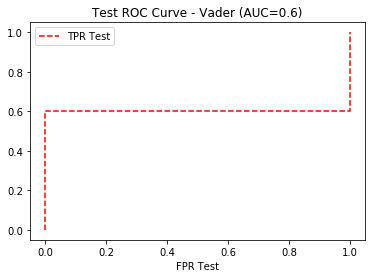

In [54]:
roc_df_test_vader.plot(
    x="FPR Test",
    y="TPR Test",
    color="red",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve - Vader (AUC={auc_test_vader})",
)

#### LSTM ROC Curve

In [55]:
# Making predictions to feed the roc_curve module
test_predictions_rnn = model.predict(X_test_rnn, batch_size=1000)

In [56]:
# Data for ROC Curve - RNN LSTM Model
fpr_test_rnn, tpr_test_rnn, thresholds_test_rnn = roc_curve(y_test_rnn, test_predictions_rnn)

# RNN LSTM AUC Curve

In [57]:
# AUC for the RNN LSTM Model
auc_test_rnn = auc(fpr_test_rnn, tpr_test_rnn)
auc_test_rnn = round(auc_test_rnn, 4)

In [58]:
# Dataframe to plot ROC Curve for the RNN LSTM model
roc_df_test_rnn = pd.DataFrame({"FPR Test": fpr_test_rnn, "TPR Test": tpr_test_rnn,})

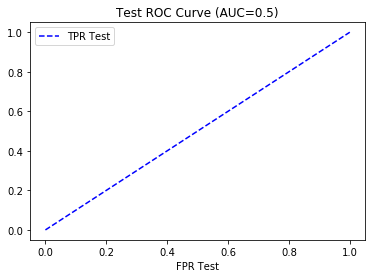

In [59]:
roc_df_test_rnn.plot(
    x="FPR Test",
    y="TPR Test",
    color="blue",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test_rnn})",
)